1. Revise your Mini Project dataset and explore the following parameters of it:
- number of columns and rows
- type of data
- distribution of numeric data (is it a normal distribution?)
- descriptive parameters of the numeric data (mean, median, mode, min, max, range,
count)
- missing values
2. Prepare the data for further analysis by
- replacing/removing the cells with damaged/missing data
- drilling down/rolling up attributes
- coding the text data with numeral labels
3. Analyze the correlations and/or the similarity of the properties as appropriate
4. Optional: Apply PCA of attributes, if needed.
5. Optional: Use different diagrams/geo-maps to visualize the data in a user-friendly
way

In [1]:
import pandas as pd
from scipy.stats import shapiro
import pandas as pd
import statistics

df = pd.read_csv('data/clean_data.csv')


In [2]:
#Assigment 1

# number of columns and rows in the dataframe.
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# type of data in the dataframe columns.
df.dtypes



Number of rows: 12
Number of columns: 28


vat                  int64
name                object
address             object
zipcode              int64
city                object
cityname           float64
protected             bool
phone              float64
email               object
fax                float64
startdate           object
enddate            float64
employees            int64
addressco          float64
industrycode         int64
industrydesc        object
companycode          int64
companydesc         object
creditstartdate    float64
creditbankrupt        bool
creditstatus       float64
owners              object
productionunits     object
t                    int64
version              int64
latitude           float64
longitude          float64
website             object
dtype: object

In [3]:
# Getting numeric values from original Dataframe.
numeric_df = df[['employees', 'latitude', 'longitude']]

# perform the Shapiro-Wilk test on each numeric column.
for col in numeric_df.columns:
    stat, p = shapiro(numeric_df[col])
    alpha = 0.05
    if p > alpha:
        print(f"{col} is likely normally distributed (p={p:.3f})")
    else:
        print(f"{col} is not normally distributed (p={p:.3f})")

employees is not normally distributed (p=0.000)
latitude is not normally distributed (p=0.000)
longitude is not normally distributed (p=0.000)


In [4]:
# descriptive parameters of the numeric data (mean, median, mode, min, max, range, count)


# convert multiple columns to lists
employees_list = numeric_df['employees'].tolist()
latitude_list = numeric_df['latitude'].tolist()
longitude_list = numeric_df['longitude'].tolist()
combined_list = [employees_list, latitude_list, longitude_list]

# calculate the sum, count, mean, median, mode, variance, and standard deviation

for i in combined_list: 
    # print the results
    print(f"List of numbers: {i} \n")
    print(f"Mean: {sum(i) / len(i)}")
    print(f"Median: {statistics.median(i)}")
    print(f"Mode: {statistics.mode(i)}")
    print(f"Min: {min(i)}")
    print(f"Max: {max(i)}")
    print(f"Range: {max(i) - min(i)}")
    print(f"Count: {len(i)} \n")




List of numbers: [1886, 1464, 34, 1596, 8, 19, 2299, 21663, 86, 60, 77, 3614] 

Mean: 2733.8333333333335
Median: 775.0
Mode: 1886
Min: 8
Max: 21663
Range: 21655
Count: 12 

List of numbers: [55.73613, 55.708655, 55.723369, 55.749182, 55.734142, 55.674321, 55.689618, 55.754555, 55.733204, 55.682038, 57.4455297, 55.653577] 

Mean: 55.857026725
Median: 55.728286499999996
Mode: 55.73613
Min: 55.653577
Max: 57.4455297
Range: 1.791952700000003
Count: 12 

List of numbers: [12.393105, 12.591288, 12.376387, 12.294416, 12.380579, 12.591612, 12.590014, 12.455185, 12.391164, 12.583964, 10.4937435, 12.544796] 

Mean: 12.307187791666665
Median: 12.424145
Mode: 12.393105
Min: 10.4937435
Max: 12.591612
Range: 2.097868499999999
Count: 12 



In [5]:
# Exploring the missing values values in the dataset.

# Count the number of missing values in each column
missing_count = df.isna().sum()

# Select the column names with missing values
missing_cols = missing_count[missing_count > 0].index.tolist()

# Print the column names with missing values and their respective missing value counts
for col in missing_cols:
    print(f"{col}: {missing_count[col]} missing values")

cityname: 12 missing values
phone: 2 missing values
email: 8 missing values
fax: 9 missing values
enddate: 12 missing values
addressco: 12 missing values
creditstartdate: 12 missing values
creditstatus: 12 missing values
owners: 10 missing values


In [9]:
# Replace or remove the cells with damaged/missing data. We have chosen to remove the following columns, 'cityname','fax', 'enddate', 'addressco', 'creditstartdate', 'creditstatus' and 'owners'.

df_cleaned = df[['vat','name','address','zipcode','city','protected','phone','email','startdate','employees','industrycode','industrydesc','companycode','companydesc','creditbankrupt','productionunits','t','version','latitude','longitude','website']]
#df_cleaned.head(5)

df_cleaned = df_cleaned.rename(columns={'startdate': 'startyear'})


# Custom function to extract the year from a date string
def extract_year(date_string):
    return date_string[-4:]

# apply the custom function to the 'Birthdate' column of the dataframe
df_cleaned['startyear'] = df_cleaned['startyear'].apply(extract_year)

df_cleaned


,vat,name,address,zipcode,city,protected,phone,email,startyear,employees,...,industrydesc,companycode,companydesc,creditbankrupt,productionunits,t,version,latitude,longitude,website
0,26911745,KMD A/S,Lautrupparken 40,2750,Ballerup,False,44601000.0,info@kmd.dk,2002,1886,...,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,False,"[{'pno': 1017630322, 'main': False, 'name': 'K...",100,6,55.736130,12.393105,https://www.kmd.dk/
1,13594376,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",Sundkrogsgade 4,2100,København Ø,False,39175000.0,NaN,1999,1464,...,Livsforsikring,60,Aktieselskab,False,"[{'pno': 1000591581, 'main': False, 'name': 'P...",100,6,55.708655,12.591288,https://pfa.dk/privat/
2,40916458,Dynatest A/S,Tempovej 27,2750,Ballerup,False,70253355.0,NaN,2019,34,...,"Fremstilling af udstyr til måling, afprøvning,...",60,Aktieselskab,False,"[{'pno': 1025210030, 'main': True, 'name': 'Dy...",100,6,55.723369,12.376387,https://dynatest.com/
3,42334219,OTICON A/S,Kongebakken 9,2765,Smørum,False,39177100.0,NaN,1957,1596,...,Fremstilling af høreapparater og dele hertil,60,Aktieselskab,False,"[{'pno': 1006552453, 'main': False, 'name': 'O...",100,6,55.749182,12.294416,https://www.oticon.dk/hearing-aid-users
4,78040017,TOPDANMARK A/S,Borupvang 4,2750,Ballerup,False,70158585.0,NaN,1985,8,...,Finansielle holdingselskaber,60,Aktieselskab,False,"[{'pno': 1015253246, 'main': False, 'name': 'T...",100,6,55.734142,12.380579,https://www.topdanmark.dk/
5,10121361,NORTHTECH ApS,"Wildersgade 51, 1",1408,København K,True,NaN,kontakt@northtech.dk,2003,19,...,Computerprogrammering,80,Anpartsselskab,False,"[{'pno': 1009658463, 'main': True, 'name': 'NO...",100,6,55.674321,12.591612,https://northtech.dk/
6,14814833,Netcompany A/S,"Grønningen 17, 1",1270,København K,True,70131440.0,info@netcompany.com,1991,2299,...,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,False,"[{'pno': 1017633488, 'main': False, 'name': 'N...",100,6,55.689618,12.590014,https://www.netcompany.com/da
7,24256790,NOVO NORDISK A/S,Novo Alle 1,2880,Bagsværd,False,44448888.0,NaN,1931,21663,...,Fremstilling af farmaceutiske præparater,60,Aktieselskab,False,"[{'pno': 1017661031, 'main': False, 'name': 'N...",100,6,55.754555,12.455185,https://www.novonordisk.dk/
8,29177015,FORMPIPE SOFTWARE A/S,Lautrupvang 1,2750,Ballerup,False,33256555.0,NaN,2005,86,...,Computerprogrammering,60,Aktieselskab,False,"[{'pno': 1014492123, 'main': False, 'name': 'F...",100,6,55.733204,12.391164,https://www.formpipe.com/da/
9,27506488,ALPHA SOLUTIONS A/S,"Gothersgade 14, 4",1123,København K,True,70206538.0,NaN,2004,60,...,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,False,"[{'pno': 1010322290, 'main': True, 'name': 'AL...",100,6,55.682038,12.583964,https://www.alpha-solutions.com


In [14]:
# Numeral labels for selected text data.

# With the columns containing boolean values we will replace False / True with binary numbers 0 for false and 1 for true.


# use astype to convert boolean values to integers.
df_cleaned['creditbankrupt'] = df_cleaned['creditbankrupt'].astype(int)
df_cleaned['protected'] = df_cleaned['protected'].astype(int)

df_cleaned.to_csv('PS3.csv', ignoreIndex=True)


,vat,name,address,zipcode,city,protected,phone,email,startyear,employees,...,industrydesc,companycode,companydesc,creditbankrupt,productionunits,t,version,latitude,longitude,website
0,26911745,KMD A/S,Lautrupparken 40,2750,Ballerup,0,44601000.0,info@kmd.dk,2002,1886,...,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,0,"[{'pno': 1017630322, 'main': False, 'name': 'K...",100,6,55.736130,12.393105,https://www.kmd.dk/
1,13594376,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",Sundkrogsgade 4,2100,København Ø,0,39175000.0,NaN,1999,1464,...,Livsforsikring,60,Aktieselskab,0,"[{'pno': 1000591581, 'main': False, 'name': 'P...",100,6,55.708655,12.591288,https://pfa.dk/privat/
2,40916458,Dynatest A/S,Tempovej 27,2750,Ballerup,0,70253355.0,NaN,2019,34,...,"Fremstilling af udstyr til måling, afprøvning,...",60,Aktieselskab,0,"[{'pno': 1025210030, 'main': True, 'name': 'Dy...",100,6,55.723369,12.376387,https://dynatest.com/
3,42334219,OTICON A/S,Kongebakken 9,2765,Smørum,0,39177100.0,NaN,1957,1596,...,Fremstilling af høreapparater og dele hertil,60,Aktieselskab,0,"[{'pno': 1006552453, 'main': False, 'name': 'O...",100,6,55.749182,12.294416,https://www.oticon.dk/hearing-aid-users
4,78040017,TOPDANMARK A/S,Borupvang 4,2750,Ballerup,0,70158585.0,NaN,1985,8,...,Finansielle holdingselskaber,60,Aktieselskab,0,"[{'pno': 1015253246, 'main': False, 'name': 'T...",100,6,55.734142,12.380579,https://www.topdanmark.dk/
5,10121361,NORTHTECH ApS,"Wildersgade 51, 1",1408,København K,1,NaN,kontakt@northtech.dk,2003,19,...,Computerprogrammering,80,Anpartsselskab,0,"[{'pno': 1009658463, 'main': True, 'name': 'NO...",100,6,55.674321,12.591612,https://northtech.dk/
6,14814833,Netcompany A/S,"Grønningen 17, 1",1270,København K,1,70131440.0,info@netcompany.com,1991,2299,...,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,0,"[{'pno': 1017633488, 'main': False, 'name': 'N...",100,6,55.689618,12.590014,https://www.netcompany.com/da
7,24256790,NOVO NORDISK A/S,Novo Alle 1,2880,Bagsværd,0,44448888.0,NaN,1931,21663,...,Fremstilling af farmaceutiske præparater,60,Aktieselskab,0,"[{'pno': 1017661031, 'main': False, 'name': 'N...",100,6,55.754555,12.455185,https://www.novonordisk.dk/
8,29177015,FORMPIPE SOFTWARE A/S,Lautrupvang 1,2750,Ballerup,0,33256555.0,NaN,2005,86,...,Computerprogrammering,60,Aktieselskab,0,"[{'pno': 1014492123, 'main': False, 'name': 'F...",100,6,55.733204,12.391164,https://www.formpipe.com/da/
9,27506488,ALPHA SOLUTIONS A/S,"Gothersgade 14, 4",1123,København K,1,70206538.0,NaN,2004,60,...,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,0,"[{'pno': 1010322290, 'main': True, 'name': 'AL...",100,6,55.682038,12.583964,https://www.alpha-solutions.com


In [16]:
# Correlation

corr_matrix = df_cleaned.corr()
corr_matrix


,vat,zipcode,protected,phone,employees,industrycode,companycode,creditbankrupt,t,version,latitude,longitude
vat,1.000000,0.553710,-0.203657,0.519037,-0.198320,-0.055573,-0.376497,NaN,NaN,NaN,0.452625,-0.529280
zipcode,0.553710,1.000000,0.166378,0.542736,-0.047915,-0.041742,-0.205734,NaN,NaN,NaN,0.969822,-0.985403
protected,-0.203657,0.166378,1.000000,0.714060,-0.257663,0.360450,0.426401,NaN,NaN,NaN,0.391703,-0.308208
phone,0.519037,0.542736,0.714060,1.000000,-0.278476,0.172713,NaN,NaN,NaN,NaN,0.643983,-0.618563
employees,-0.198320,-0.047915,-0.257663,-0.278476,1.000000,-0.560307,-0.140689,NaN,NaN,NaN,-0.115355,0.133052
industrycode,-0.055573,-0.041742,0.360450,0.172713,-0.560307,1.000000,0.171664,NaN,NaN,NaN,0.064023,-0.001288
companycode,-0.376497,-0.205734,0.426401,NaN,-0.140689,0.171664,1.000000,NaN,NaN,NaN,-0.114787,0.154233
creditbankrupt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


# Before we can apply PCA on the attributes we need to preprocess and standardize the data.


# normalize the numeric data
scaler = StandardScaler()
X_norm = scaler.fit_transform(numeric_df)

df_normalized = pd.DataFrame(X_norm, columns=numeric_df.columns)
df_normalized

# Create a PCA instance
pca = PCA(n_components=2)

# Fit the PCA model on the data
pca.fit(df_normalized)

# Transform the data using the fitted PCA model
X_pca = pca.transform(df_normalized)

# Print the transformed data
print(X_pca)

[[-0.25844152 -0.19322462]
 [-0.53464155 -0.31159395]
 [-0.20198998 -0.50699764]
 [-0.10723655 -0.21915948]
 [-0.19086531 -0.50934115]
 [-0.54272741 -0.56562926]
 [-0.58499674 -0.1750322 ]
 [-0.88610856  3.14900814]
 [-0.20778    -0.49849252]
 [-0.52313355 -0.55508597]
 [ 4.65679548  0.33853111]
 [-0.61887429  0.04701754]]


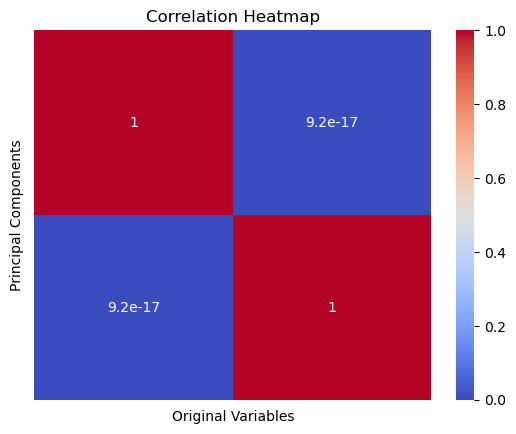

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap used to visualize the correlation between attributes.

corr_mat = np.corrcoef(X_pca, rowvar=False)

# create the heatmap
sns.heatmap(corr_mat, cmap='coolwarm', annot=True, xticklabels=False, yticklabels=False)

# customize the plot
plt.title('Correlation Heatmap')
plt.xlabel('Original Variables')
plt.ylabel('Principal Components')
plt.show()
